<a href="https://colab.research.google.com/github/akanksha0911/DeepLearning-DeepDive-Assignment1-/blob/main/Blackbox_DeepLearning_fastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By Akanksha Rawat**

**From fastAI-  
What is deep learning - Deep learning is a computer technique to extract and transform data–-with use cases ranging from human speech recognition to animal imagery classification–-by using multiple layers of neural networks. Each of these layers takes its inputs from previous layers and progressively refines them. The layers are trained by algorithms that minimize their errors and improve their accuracy. In this way, the network learns to perform a specified task. **

In [ ]:
!pip install fastai==2.2.5

In [ ]:
!pip install fastai --upgrade

In [ ]:
import fastai
print(fastai.__version__)

In [ ]:
!pip install -Uqq fastbook

In [5]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


Deep learning is a subset of machine learning, which is essentially a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain—albeit far from matching its ability—allowing it to “learn” from large amounts of data. While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy.

Deep learning drives many artificial intelligence (AI) applications and services that improve automation, performing analytical and physical tasks without human intervention.

**Image Classification using cnn_learner**

A dataset called the Oxford-IIIT Pet Dataset that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection to the GPU server and will then be extracted.
A pretrained model that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.
The pretrained model will be fine-tuned using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats.

In [7]:
from fastbook import *
from fastai.vision.all import *


In [7]:

path = untar_data(URLs.PETS)/'images'

In [8]:
# function categorizing the image as cat
def isCat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct= 0.2,
                                      seed = 42, 
                                      label_func= isCat, item_tfms = Resize(224))
learn = cnn_learner(dls, resnet34, metrics= error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.185519,0.015809,0.005413,38:40


epoch,train_loss,valid_loss,error_rate,time
0,0.058191,0.011301,0.003383,54:27


In [9]:
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

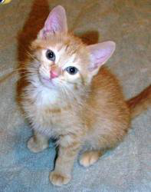

In [10]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [11]:
isCat,_,probs = learn.predict(img)
print(f"Is this a cat?: {isCat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


**Segmentation using unet_learner**

**Creating a model that can recognize the content of every individual pixel in an image is called segmentation.**

In [12]:
# code for image segmentation using Segmentation Data Loader
image_path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(image_path/"images"),
    label_func = lambda o: image_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(image_path/'codes.txt', dtype=str)
  )
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.951318,2.390301,01:21


epoch,train_loss,valid_loss,time
0,2.160158,1.786768,01:24
1,1.832829,1.188028,01:23
2,1.642977,1.271762,01:23
3,1.460951,0.914032,01:23
4,1.295178,0.817246,01:23
5,1.161561,0.715472,01:26
6,1.051312,0.696667,01:22
7,0.967247,0.690181,01:22


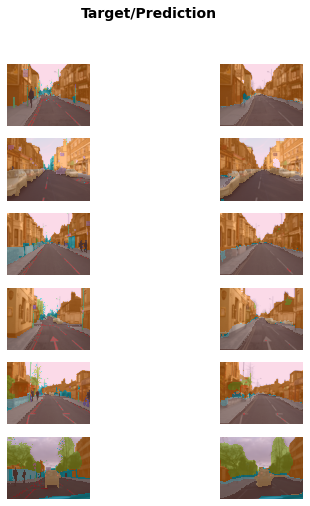

In [13]:
learn.show_results(max_n = 6, figsize=(7,8))

**Text Classification Learner for Sentiment Analysis**

In [8]:
from fastai.text.all import *

# text classifier using Text Data loader for sentiment analysis
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid = 'test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult = 0.5, metrics = accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463534,0.387841,0.826360,07:44


epoch,train_loss,valid_loss,accuracy,time
0,0.307862,0.246990,0.901320,15:07
1,0.246051,0.241155,0.900920,15:12
2,0.194993,0.182797,0.928880,15:12
3,0.145592,0.192420,0.929000,15:13


In [9]:
# testing the pidiction
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([7.4556e-05, 9.9993e-01]))

**Tabular Learner**

In [10]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.374053,0.372600,0.828471,00:07
1,0.371680,0.362344,0.833692,00:07
2,0.350883,0.358986,0.837838,00:07


**Ranking - Collab_learner**

In [12]:
from fastai.collab import *
# it uses collab data loader 
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range = (0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510421,1.409248,00:00


epoch,train_loss,valid_loss,time
0,1.378706,1.353837,00:00
1,1.283051,1.182615,00:00
2,1.051507,0.870182,00:00
3,0.827181,0.705093,00:00
4,0.702141,0.661779,00:00
5,0.646693,0.647653,00:00
6,0.621587,0.642445,00:00
7,0.605313,0.639461,00:00
8,0.602502,0.638560,00:00
9,0.606968,0.638429,00:00


In [13]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,79.0,83.0,4.5,4.650622
1,49.0,77.0,5.0,4.435779
2,64.0,51.0,4.0,4.211000
3,98.0,7.0,5.0,4.833302
4,1.0,45.0,4.0,3.840652
5,86.0,48.0,3.0,3.797843
6,8.0,84.0,4.5,4.272635
7,93.0,71.0,3.0,4.155020
8,35.0,16.0,4.0,3.304728
